In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
import numpy as np

In [3]:
c = [
    'itg_mean',
    'itg_stdev',
    'itg_kurtosis',
    'itg_skewness',
    'dm_snr_mean',
    'dm_snr_stdev',
    'dm_snr_kurtosis',
    'dm_snr_skew',
    'candidate_pulsar'
]

In [11]:
df = pd.read_csv('HTRU2/HTRU_2.csv', header = None, names = c)

In [12]:
X = df[df.columns[:-1]]
y = df.candidate_pulsar

df_train, df_test = train_test_split(df,
                                   test_size = 0.2,
                                   random_state = 25,
                                    stratify = y)

In [13]:
from imblearn.over_sampling import RandomOverSampler

train_X = df_train[df_train.columns[:-1]]
train_y = df_train.candidate_pulsar

ros = RandomOverSampler(random_state = 25)
X_ovs, y_ovs = ros.fit_sample(train_X, train_y)

In [26]:
df_train_ovs = X_ovs
df_train_ovs['candidate_pulsar'] = y_ovs

In [27]:
with open('pickles/df_train.pickle', 'wb') as to_write:
    pickle.dump(df_train, to_write)
    
with open('pickles/df_test.pickle', 'wb') as to_write:
    pickle.dump(df_test, to_write)
    
with open('pickles/df_train_ovs.pickle', 'wb') as to_write:
    pickle.dump(df_train_ovs, to_write)   

In [8]:
df_train.shape, df_test.shape

((14318, 9), (3580, 9))

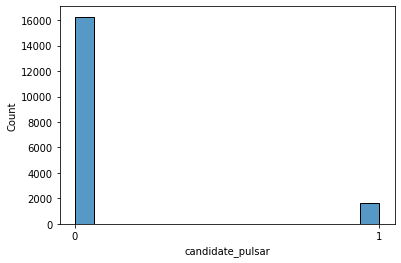

In [9]:
sns.histplot(data = df, x = 'candidate_pulsar');
plt.xticks([0, 1]);

In [13]:
df.candidate_pulsar.value_counts()
1639/(1639+16259)

0.09157447759526204

In [8]:
df_train.loc[:, 'candidate_pulsar'] = df_train.loc[:, 'candidate_pulsar'].astype('category')
df_train.loc[:, 'candidate_pulsar'] = df_train.loc[:, 'candidate_pulsar'].cat.as_ordered()

/Users/emma-clairemccarthy/opt/anaconda3/envs/ids/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [9]:
df_train.head()

,itg_mean,itg_stdev,itg_kurtosis,itg_skewness,dm_snr_mean,dm_snr_stdev,dm_snr_kurtosis,dm_snr_skew,candidate_pulsar
6178,115.867188,52.065969,0.345099,-0.245353,1.871237,13.149709,10.949098,155.220425,0
1928,111.437500,33.625871,0.414664,2.443440,0.983278,12.023238,14.788855,248.676388,0
8215,113.289062,41.679048,0.268991,0.552540,5.698161,28.821357,5.334615,28.810536,0
12336,123.945312,47.528332,0.320808,0.420306,2.282609,17.269032,9.164531,95.092448,0
11808,119.992188,51.341153,0.214492,-0.342845,1.850334,13.773861,11.132828,154.517287,0


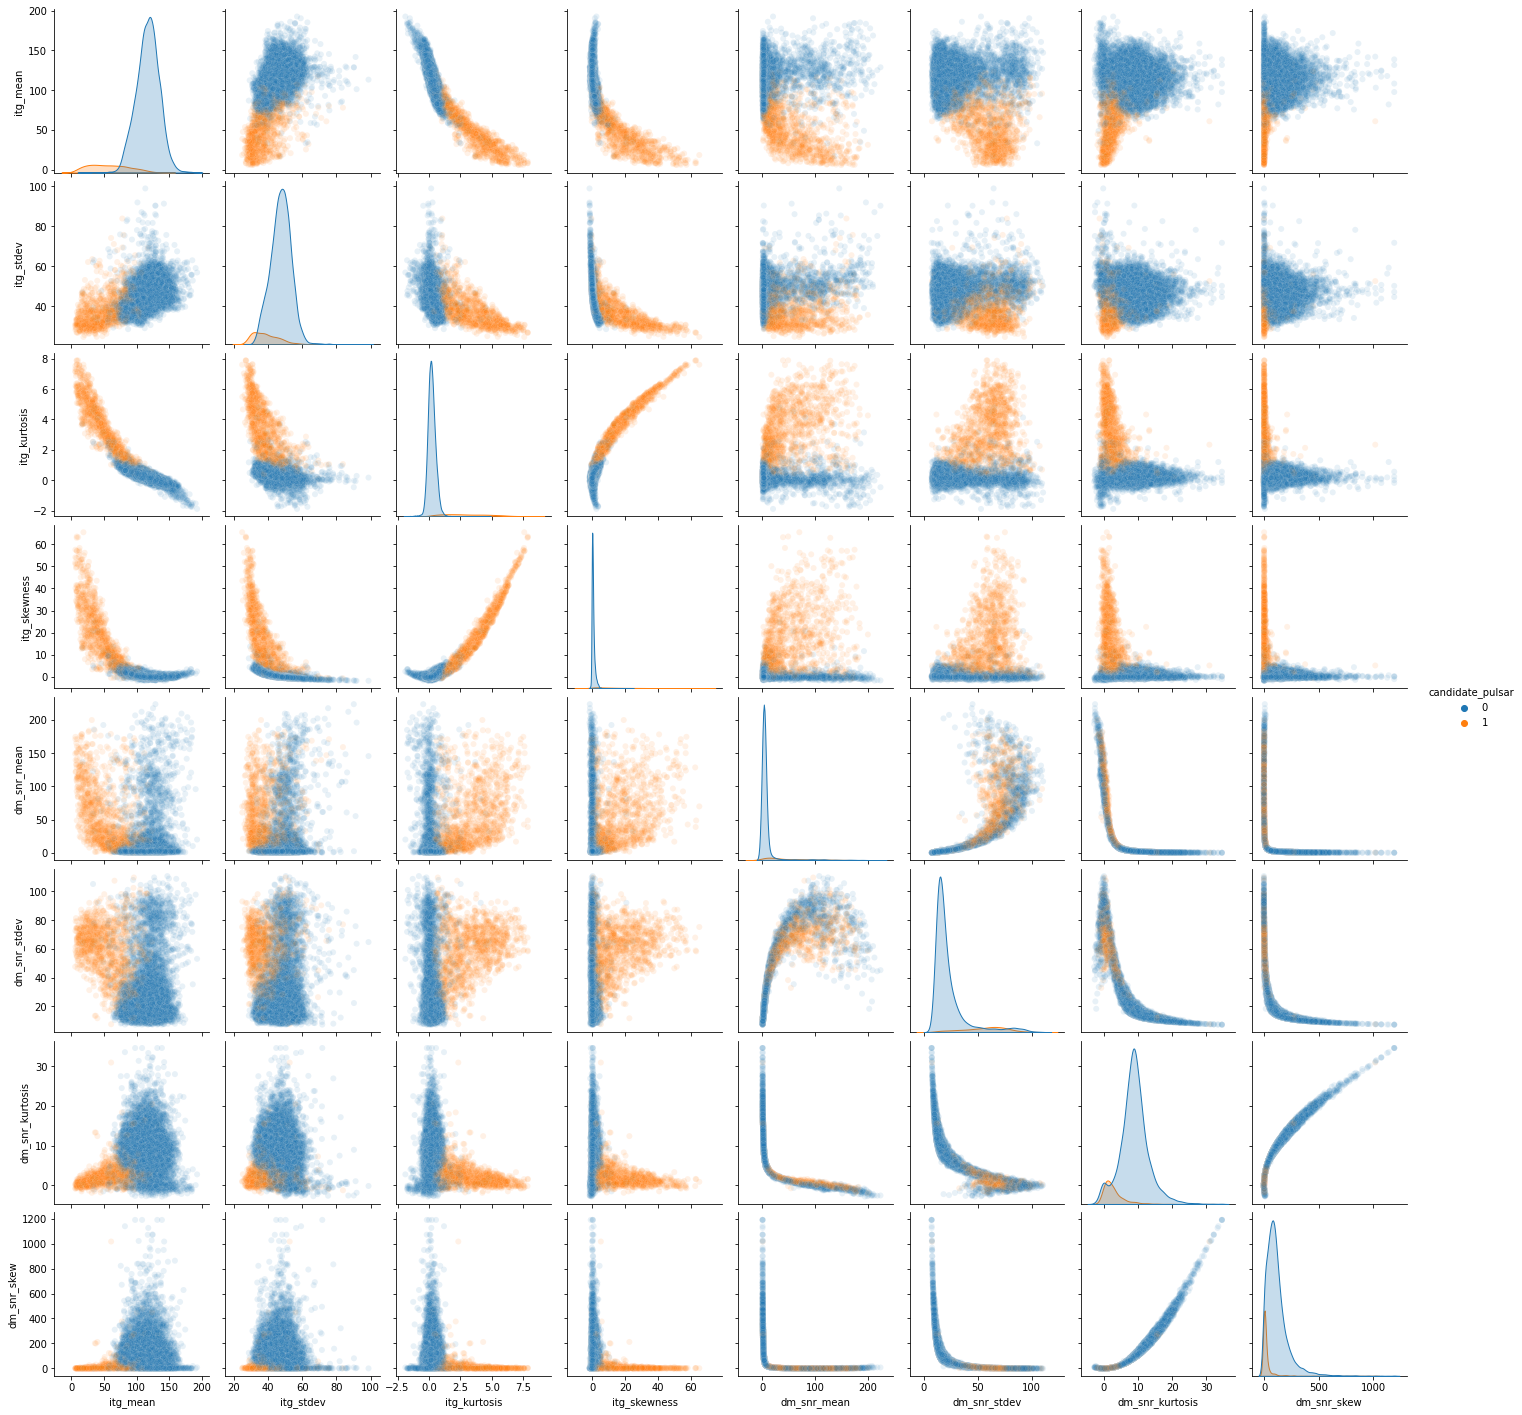

In [10]:
#for i in df_train.columns[:-1]:    
sns.pairplot(df_train, plot_kws={'alpha':0.1}, hue = 'candidate_pulsar');

<AxesSubplot:xlabel='itg_kurtosis', ylabel='candidate_pulsar'>

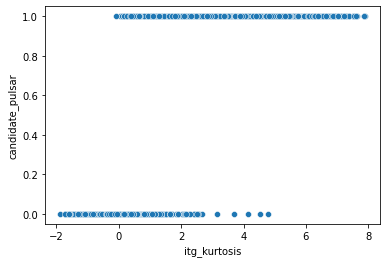

In [11]:
sns.scatterplot(data = df_train, x = 'itg_kurtosis', y = 'candidate_pulsar')

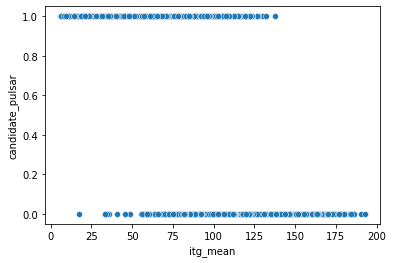

In [12]:
sns.scatterplot(data = df_train, x = 'itg_mean', y = 'candidate_pulsar');